# Unsupervised Learning

- Vast majority of data is unlabled i.e. they have X but no y 
- There are many unsupervised learning algo (including Dimensionality which is one form of unsupervised learning)
    - Clustering 
        ```
        a. Grouping similar instances together 
        b. Great tool for data analysis, customer segmentation, recommendation system, search engine, image segmentation, semi supervised learning 
        ```
    - Anamoly Detection 
        ```
        a. Learn what is "Normal" data
        b. Detect abnormal instances 
        c. Identify anamoly in production line or new trend in timeseries 
        ```
    - Density Estimation
        ``` 
        a. Estimate Probablity Density Function (PDF) of the random process that generated the dataset 
        b. Density estimation is normally used for abnormal instances located in very low density regions are likely to be anamolies 
        c. Helpful for data visualization 
    
    


In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

# load data from iris dataset and print the target values 
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

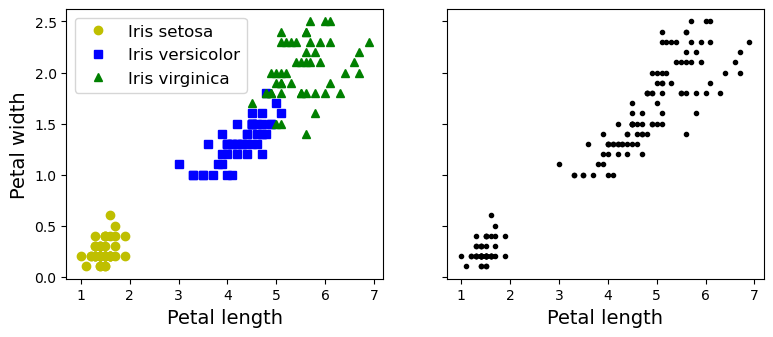

In [3]:
# plot points on graph for petal length and petal width 
plt.figure(figsize=(9, 3.5))

# Plot iris data
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

# plot iris dataset with no y values 
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

``` 
In left diagram we have petal length against petal width and using target value we identified the class flower belongs to 
However, if target values are not given then piture in right - we cannot separate the versicolor with virginica flower

Now there are 4 features within iris dataset sepal length and width, petal length and width. Using Gaussian mixture model we can separate these cluster clearly. 


In [4]:
# Gaussian mixture model can help to separate these clusters clearly
from sklearn.mixture import GaussianMixture

# telling Gaussian mixture model we have 3 classes here (in real world this will be unknown)
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [5]:
from scipy import stats

# Let's map each cluster to a class. Instead of hard coding the mapping (as is done in the book, for simplicity), 
# we will pick the most common class for each cluster (using the scipy.stats.mode() function):
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

mapping

{np.int64(1): np.int64(0), np.int64(2): np.int64(1), np.int64(0): np.int64(2)}

In [6]:
# get the class value from the mapping dictionary 
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

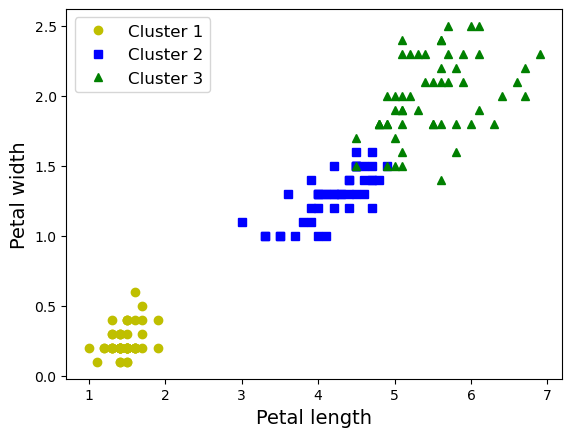

In [7]:
# using prediction class try to plot the clusters 
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [8]:
np.sum(y_pred==y)

np.int64(145)

In [9]:
# get the percentage accuracy using target class 
np.sum(y_pred==y) / len(y_pred)

np.float64(0.9666666666666667)

### 1. KMeans 

In [31]:
# create some blobs 
from sklearn.datasets import make_blobs

# give the certer of blobs 
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [32]:
# create blob items with 2000 samples and provide the center and standard deviation 
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [33]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

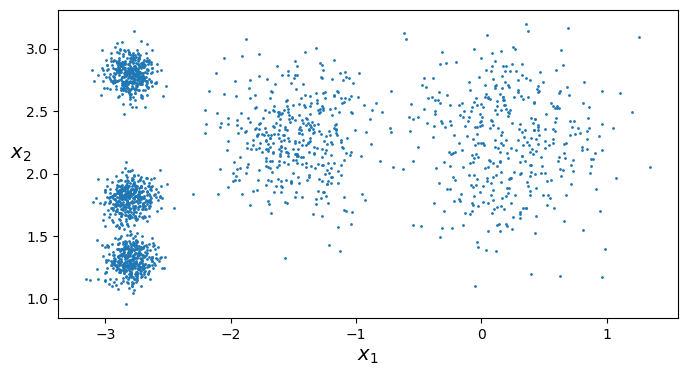

In [34]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

``` 
We have created 5 blobs on the the graph. Using KMean lets try to find out the center of each blob item and assign each intance to closed blob

In [35]:
from sklearn.cluster import KMeans

In [ ]:
k = 5

# setting random state=7 to ensure we get same image as book 
kmeans = KMeans(n_clusters=k, n_init=10, random_state=7)
y_pred = kmeans.fit_predict(X)

In [44]:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [45]:
# here in KMeans context label of instance is the index of cluster the instance was assigned to 
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [46]:
# check if prediction contains label values 
y_pred is kmeans.labels_

True

In [47]:
# get the centroid for each cluster
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [48]:
# predict the values using KMean model 
X_new = np.array([[0,2], [3,2], [-3,3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

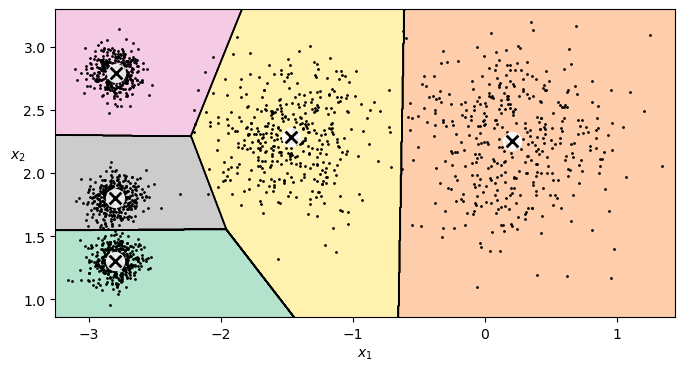

In [ ]:
# creating decision boundary
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):

    # caluclate position of centroid 
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]

    # put the centroid value as scatter plot with x mark     
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):

    # get min and max value from the X values
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1

    # create mest grid from min to max with 1000 points 
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    # predict the value using cluter 
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot countors so that each cluster have a color 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")

    # plot line acrss the boundary 
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

    # plot the data
    plot_data(X)

    # get the centorids and plot them 
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    # show lables 
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)

    # show labels 
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

``` 
The data are clustered properly however except for top left and central where few points were mislabelled near the decision boundary
KMeans Algorithim does not behave very well when blob items are of different diameters because all it cares about when assigning an instance to cluster is the distance of instance to centroid
Instead of assigning each instance to a cluster, which is hard clustering. It is useful to give instance a score for each instance - called soft clustering. the score here can be distance from centroid or similarity score using Gaussian Radial Basis (GRB) function. 

In KMeans the transform() method gives the distannce from each instance to centroid
```

In [52]:
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

In [ ]:
# now perform soft clustering 
kmeans.transform(X_new).round(2)

# here first instance is 2.89 away from first centroid, 0.33 from second centroid and so on... 

array([[2.89, 0.33, 2.9 , 1.49, 2.81],
       [5.84, 2.8 , 5.85, 4.48, 5.81],
       [1.71, 3.29, 0.29, 1.69, 1.21],
       [1.22, 3.22, 0.36, 1.55, 0.73]])

In [ ]:
# validate above calculated distance by checking the euclidian distance
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[2.89, 0.33, 2.9 , 1.49, 2.81],
       [5.84, 2.8 , 5.85, 4.48, 5.81],
       [1.71, 3.29, 0.29, 1.69, 1.21],
       [1.22, 3.22, 0.36, 1.55, 0.73]])

### K Mean Algorithim 

In [65]:
# create three K mean model with different number of iterations 
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=42)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=42)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=42)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=42)

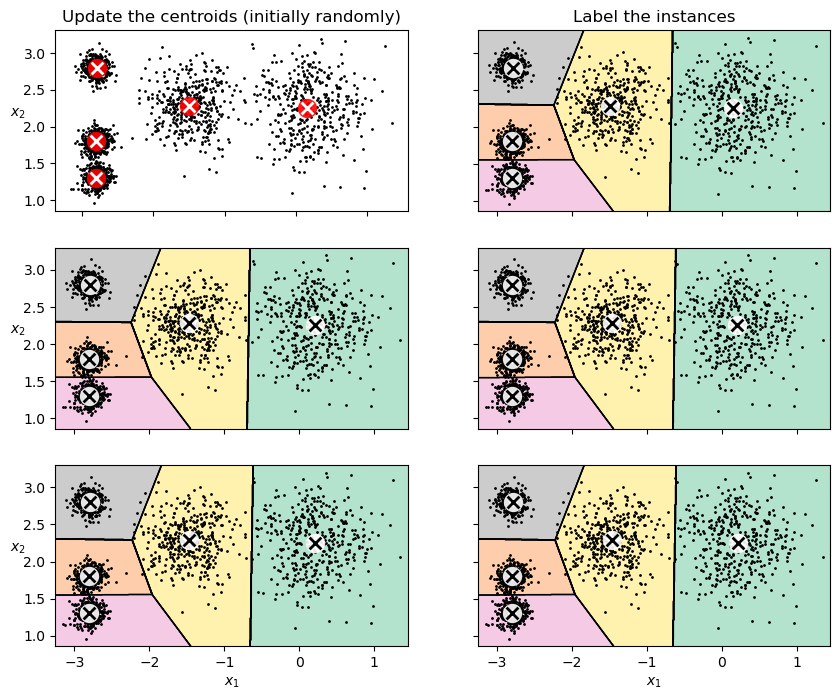

In [66]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

``` 
The algo is guranteed to converge; it may not converge to the right solution (i.e. may converge to local optima)
Whether it does converge or not is dependent on centroid initialization. Below are 2 more plots for different random state values 

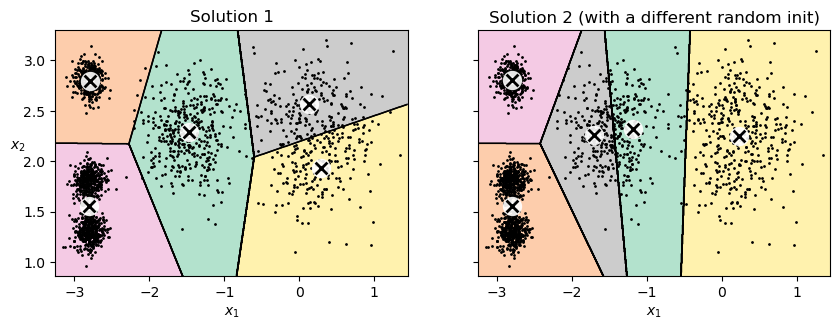

In [68]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=7)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

``` 
Centroid initialization method 

Way 1: If you know the centroid already (by running some other algo before) then you can provide numpy array to "init" hyperparameter and set "n_init=1 "
Way 2: Keep running algo multiple times with different random intialization and keep the best solution. 
Number of random initialization is controlled by hyperparameter n_init. Default value is 10 i.e. algo will run 10 times and keeps the best selection
But how does model know the best solution -> Well it keep tracks of performance metric called interia. Interia is the root mean squared distance of instance from the closed centroid. 
the model tries to keep interia as low as possible

In [69]:
kmeans_rnd_init1.inertia_, kmeans_rnd_init2.inertia_

(219.58201503602288, 236.9325230955793)

In [ ]:
# lowest interia 
kmeans_iter3.inertia_

211.59853725816836

``` 
score method returns negative of interia; negative because it follows the rule "bigger is better". If predictor is better than another then its score method will be as higher.

In [71]:
kmeans_iter3.score(X)

-211.5985372581684